# PHASE 3 PROJECT
## Business Understanding
In the highly competitive telecom industry, customer retention is crucial for sustained business growth. A significant challenge faced by telecom providers is customer churn, where users discontinue their services. Understanding the factors influencing churn can help companies take proactive measures to enhance customer satisfaction and reduce revenue loss.

This dataset contains various attributes related to customer usage patterns, service plans, and interactions with customer support. By analyzing this data, we aim to build a predictive model that can identify customers at high risk of churning.

## Business Objectives

1.  Predict churn probability: Develop a model to classify customers as likely to churn or likely to stay based on their usage behavior.

2. Identify key churn indicators: Determine which factors (e.g., high call charges, frequent customer service calls, etc.) contribute the most to churn.

## Data Cleaning

In [4]:
#Loading the data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

df = pd.read_csv('telecoms.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

The dataset seems to have no null or duplicated values, I will proceed to look at the visualizations and outliers

#### Removing outliers

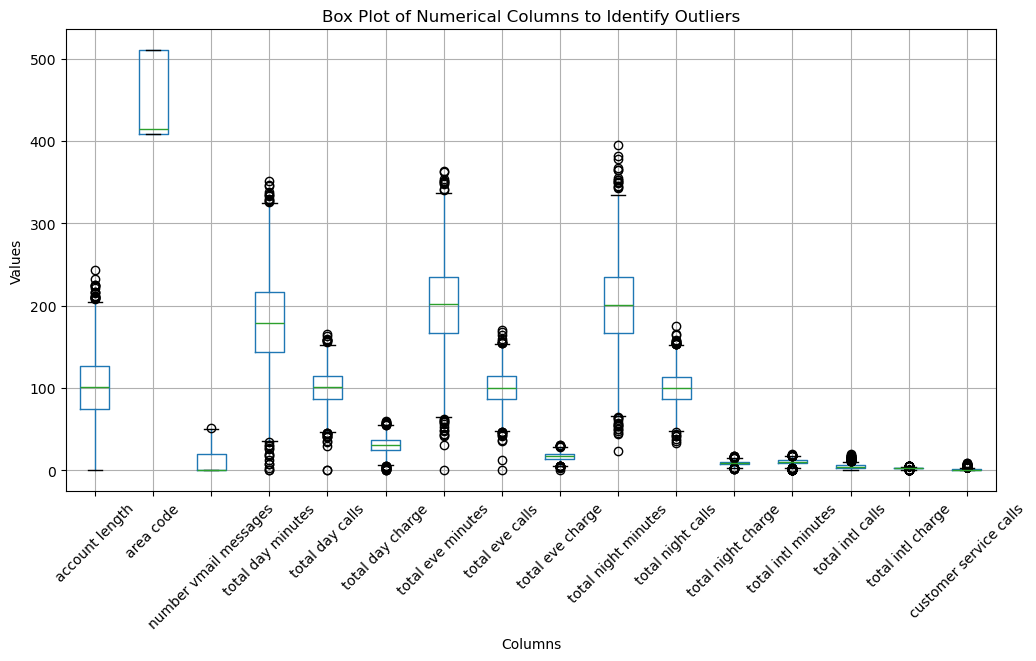

In [10]:

numerical_cols = df.select_dtypes(include=['number'])

# Plot box plots for each numerical column
plt.figure(figsize=(12, 6))
numerical_cols.boxplot(rot=45)
plt.title("Box Plot of Numerical Columns to Identify Outliers")
plt.ylabel("Values")
plt.xlabel("Columns")
plt.show()


In [11]:
#Defining columns with outliers
columns_with_outliers = [
    'account length',
    'number vmail messages',
    'total day minutes',
    'total day calls',
    'total day charge',
    'total eve minutes',
    'total eve calls',
    'total eve charge',
    'total night minutes',
    'total night calls',
    'total night charge',
    'total intl minutes',
    'total intl calls',
    'total intl charge',
    'customer service calls'
]
#removing outliers


df_cleaned = df.copy()  

for col in columns_with_outliers:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

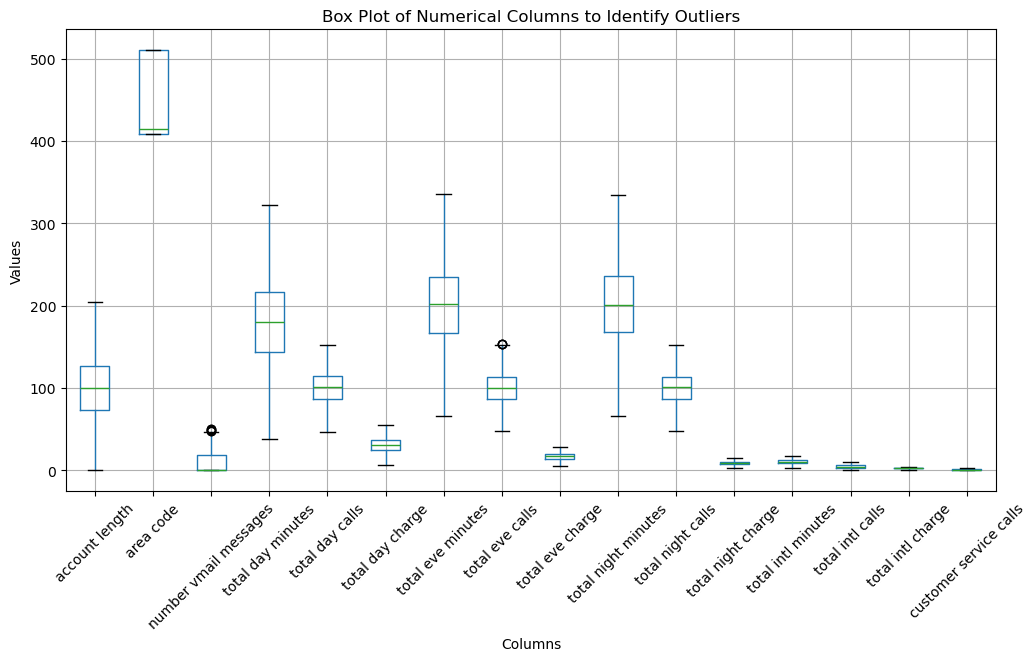

In [12]:
numerical_cols = df_cleaned.select_dtypes(include=['number'])

# Plot box plots for each numerical column
plt.figure(figsize=(12, 6))
numerical_cols.boxplot(rot=45)
plt.title("Box Plot of Numerical Columns to Identify Outliers")
plt.ylabel("Values")
plt.xlabel("Columns")
plt.show()

Our data is now cleaned, I can proceed now to do EDA

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2797 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2797 non-null   object 
 1   account length          2797 non-null   int64  
 2   area code               2797 non-null   int64  
 3   phone number            2797 non-null   object 
 4   international plan      2797 non-null   object 
 5   voice mail plan         2797 non-null   object 
 6   number vmail messages   2797 non-null   int64  
 7   total day minutes       2797 non-null   float64
 8   total day calls         2797 non-null   int64  
 9   total day charge        2797 non-null   float64
 10  total eve minutes       2797 non-null   float64
 11  total eve calls         2797 non-null   int64  
 12  total eve charge        2797 non-null   float64
 13  total night minutes     2797 non-null   float64
 14  total night calls       2797 non-null   int64

### Univirate Analysis

In [16]:
# Summary statistics of numerical columns
print(df_cleaned.describe())

       account length    area code  number vmail messages  total day minutes  \
count     2797.000000  2797.000000            2797.000000        2797.000000   
mean       100.392206   437.445120               8.131212         179.995817   
std         39.329033    42.542728              13.707224          52.589516   
min          1.000000   408.000000               0.000000          37.700000   
25%         73.000000   408.000000               0.000000         144.000000   
50%        100.000000   415.000000               0.000000         179.800000   
75%        127.000000   510.000000              19.000000         216.000000   
max        205.000000   510.000000              50.000000         322.500000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      2797.000000       2797.000000        2797.000000      2797.000000   
mean        100.577047         30.599828         201.288059       100.020379   
std          19.284581          8.94015

In [17]:
# Distribution of categorical variables
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df_cleaned[col].value_counts())


Value counts for state:
state
WV    91
MN    76
WI    68
AL    67
OH    66
NY    65
CT    64
OR    64
VA    63
UT    62
NJ    61
NC    60
KS    60
TX    60
WA    59
MT    59
MS    59
VT    58
ID    58
MI    58
MA    58
MD    57
NV    57
WY    57
IN    57
RI    56
ND    55
AZ    53
SD    53
FL    53
KY    52
MO    52
NE    52
DE    51
CO    51
IL    51
ME    51
NM    50
OK    49
TN    49
DC    48
AK    46
SC    45
GA    44
HI    44
NH    44
AR    43
LA    42
PA    38
IA    36
CA    25
Name: count, dtype: int64

Value counts for phone number:
phone number
382-4657    1
411-1045    1
347-6994    1
413-7468    1
389-6082    1
           ..
338-6018    1
409-3520    1
357-1085    1
353-3285    1
400-4344    1
Name: count, Length: 2797, dtype: int64

Value counts for international plan:
international plan
no     2530
yes     267
Name: count, dtype: int64

Value counts for voice mail plan:
voice mail plan
no     2020
yes     777
Name: count, dtype: int64


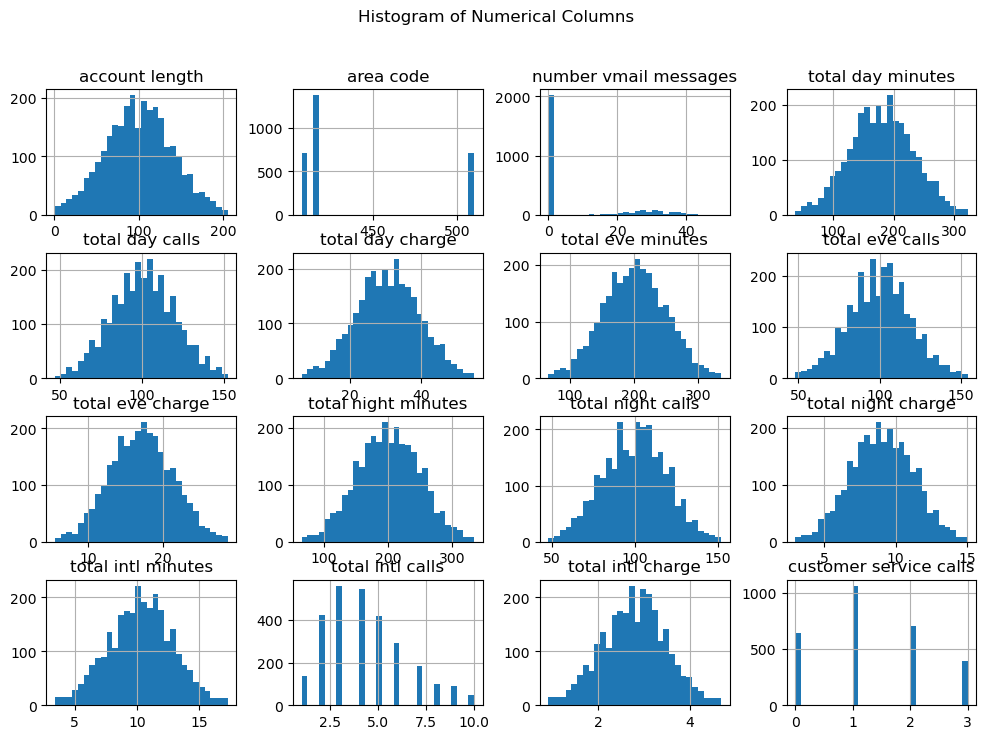

In [18]:
df_cleaned.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram of Numerical Columns")
plt.show()

From the above Histograms
The following columns seem to be having a unifirm distribution:

1 accountlength,

2 total day minutes,

3 total day calls, 

4 total day charge, 

5 total eve minutes,

6 total eve calls ,

7 total eve charge, 

8 total night minutes, 

9 total night calls,

10 total night charge

11 total intl minutes

12 total intl charge




### Bivirate Analysis

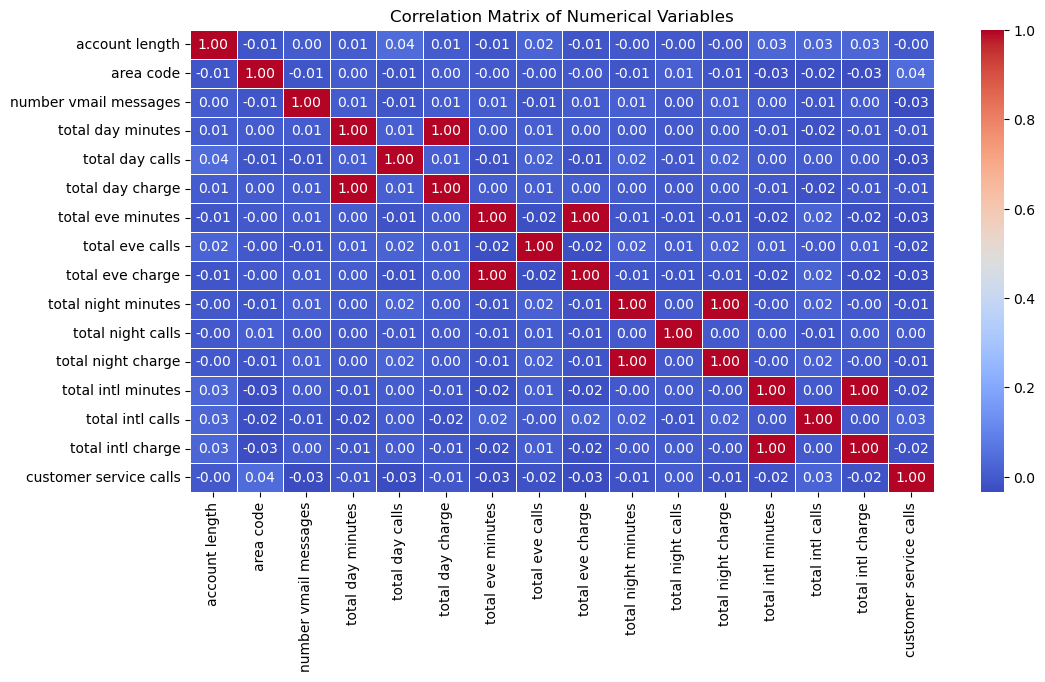

In [21]:
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Compute and plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

##### Strong Correlations (≈ 1.0)

Total day minutes and total day charge have a perfect correlation (1.00), indicating a direct linear relationship (likely because total day charge is derived from total day minutes).
Similarly, total eve minutes and total eve charge, total night minutes and total night charge, total intl minutes and total intl charge also show a perfect correlation (1.00).

Since total day charge is derived from total day minutes,total eve minutes and total eve charge and finally total night minutes and total night charge one of them from the pairs should be dropped to avoid multicollinearity in modeling.

##### Weak or No Significant Correlation (≈ 0.00)
Most other variables have near-zero correlations, meaning they don't have a strong linear relationship with each other.
For example, account length, area code, and customer service calls have very weak correlations with other numerical features, suggesting these are independent variables.

##### Slight Negative Correlations (≈ -0.01 to -0.04)
customer service calls has a slightly negative correlation with total day calls, total intl calls, and total day charge, but the values are too low to be significant.

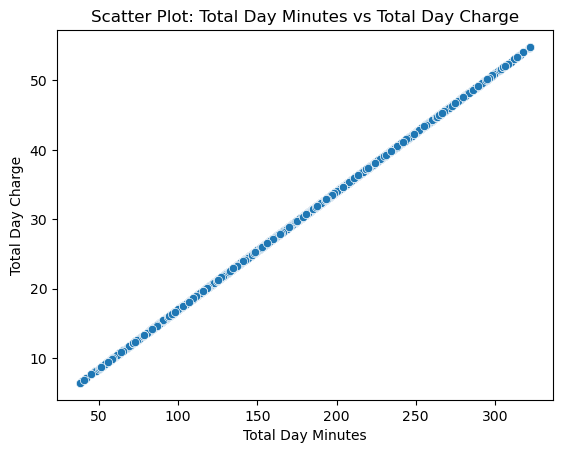

In [23]:
sns.scatterplot(x=df_cleaned["total day minutes"], y=df_cleaned["total day charge"])
plt.title("Scatter Plot: Total Day Minutes vs Total Day Charge")
plt.xlabel("Total Day Minutes")
plt.ylabel("Total Day Charge")
plt.show()

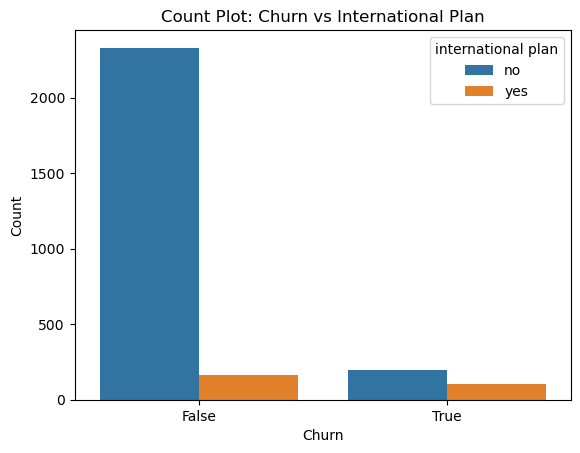

In [24]:
sns.countplot(x=df_cleaned["churn"], hue=df_cleaned["international plan"])
plt.title("Count Plot: Churn vs International Plan")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

From the above histogram, we can see that churn was mostly experienced on customers on the international plan. This makes sense as it could probably mean that they were visiting the country hence once done they did not see the need top use their phone numbers.

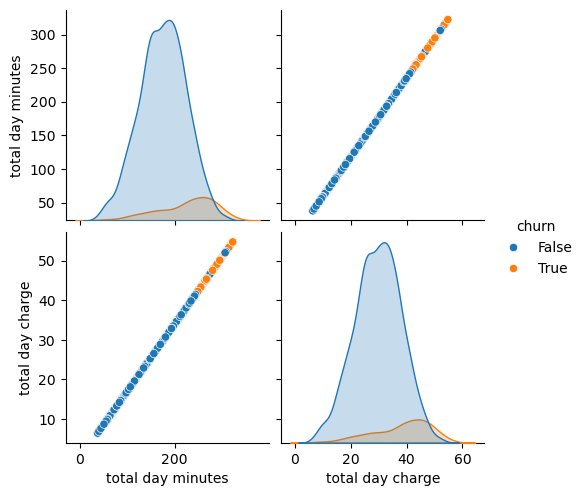

In [26]:
sns.pairplot(df_cleaned[["total day minutes", "total day charge", "churn"]], hue="churn")
plt.show()

Interpretation of the Pairplot (Total Day Minutes vs. Total Day Charge & Churn Status)

Strong Positive Correlation Between Total Day Minutes and Total Day Charge

The scatter plot shows a perfect linear relationship between total day minutes and total day charge.
This suggests that total day charge is directly calculated from total day minutes (e.g., total_day_charge = total_day_minutes * rate).
Since they are directly proportional, one of these features might be redundant for modeling.
Churn Distribution in KDE Plots

The blue KDE (Kernel Density Estimation) curves represent customers who did not churn (False), while the orange KDE curves represent customers who churned (True).
We can observe that churned customers (orange) tend to have a slightly wider spread across total day minutes and total day charge, meaning they might have spent more time on calls before leaving.
However, the distributions largely overlap, indicating that total day minutes and total day charge alone may not be strong predictors of churn.
Implication for Feature Selection

Since total day charge is derived from total day minutes, one of them should be dropped to avoid multicollinearity in modeling.
Additional features (e.g., night calls, international plan, customer service calls) should be analyzed to determine stronger churn predictors.


features = ["total day minutes", "total eve minutes", "total night minutes", "total intl minutes", "churn"]
sns.pairplot(df_cleaned[features], hue="churn", palette="coolwarm")
plt.show()


##### Multivariate Analysis  

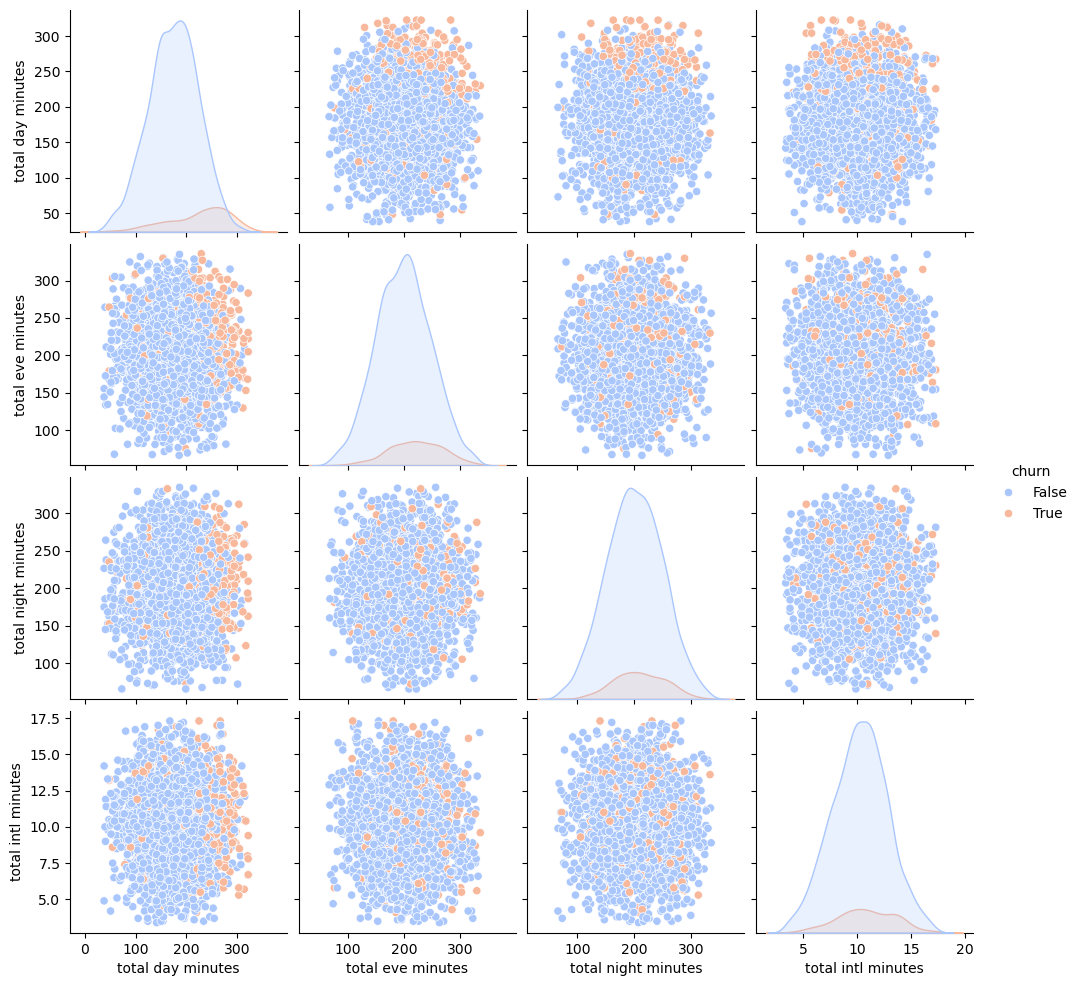

In [30]:
# Pairplot (Multiple Variables
features = ["total day minutes", "total eve minutes", "total night minutes", "total intl minutes", "churn"]
sns.pairplot(df_cleaned[features], hue="churn", palette="coolwarm")
plt.show()


1. Total Day Minutes and Churn

The first column (and row) represents Total Day Minutes.
Churned customers (orange) seem to spend more minutes on calls during the day compared to non-churned customers.
This could indicate that heavy daytime call usage is correlated with customer churn.

2. Total Evening and Night Minutes

For Total Evening Minutes and Total Night Minutes, there doesn’t seem to be a strong visible separation between churned and non-churned customers.
This suggests that evening and night call durations may not be strong indicators of churn.

3. Total International Minutes and Churn

The Total Intl Minutes (bottom right corner) shows a slightly different density distribution for churned customers.
If churned customers tend to have higher international call minutes, it might indicate dissatisfaction with international call rates or service.


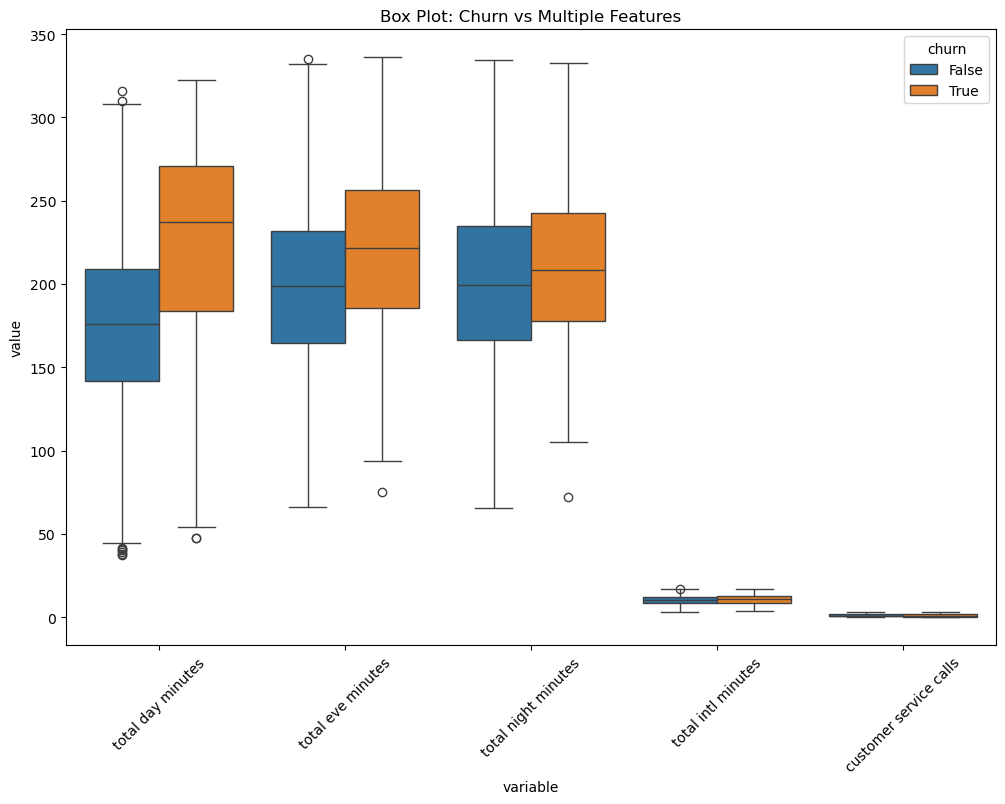

In [32]:
# Choosing multiple numerical features for box plots
features = ["total day minutes", "total eve minutes", "total night minutes", "total intl minutes", "customer service calls"]

plt.figure(figsize=(12, 8))
df_cleaned_melted = df_cleaned.melt(id_vars=["churn"], value_vars=features)
sns.boxplot(x="variable", y="value", hue="churn", data=df_cleaned_melted)
plt.xticks(rotation=45)
plt.title("Box Plot: Churn vs Multiple Features")
plt.show()

#### Findings from EDA

There are some columns which seem to be perfect correlation such as 

1 Total day minutes and Total day charge

2 Total eve minutes and total eve charge

3 Total night charge and total night minutes

They might lead to multicollinearity when designing the model as they seem to have been derived from one another

In [34]:
# Dropping Total day charge,  total eve charge Total night charge columns
df_cleaned.drop(columns=["total day charge", "total eve charge", "total night charge"], inplace=True)

In [35]:
# Dropping the phone number column as it doesn't seem to be of any use to analysis
df_cleaned.drop(columns=["phone number"], inplace=True)

In [36]:
# Dropping the account length column as it doesn't seem to be of any use to analysis
df_cleaned.drop(columns=["account length"], inplace=True)

In [37]:
print(df_cleaned.columns)

Index(['state', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')


### Pre-Processing

In [39]:
# Define X (features) and Y (target)
X = df_cleaned.drop(columns=["churn"])  # All columns except the target
Y = df_cleaned["churn"]  # Target variable

In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

# Check encoding
print(Y[:145])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
# Identify categorical columns in our x
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['state', 'international plan', 'voice mail plan'], dtype='object')


In [42]:
# Printing all categorical columns that exist in our x varibale
for i in categorical_cols:
  print(f'The variable "{i}" has {X[i].nunique()} variables: {X[i].unique()} \n')
  print(f'The variable "area code" has {X["area code"].nunique()} unique values: {X["area code"].unique()}')

The variable "state" has 51 variables: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA' 'TX'
 'FL' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'AZ' 'GA' 'AK' 'MA' 'AR' 'WI' 'OR'
 'MI' 'DE' 'IN' 'UT' 'CO' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM' 'NV' 'DC' 'MD'
 'KY' 'LA' 'ME' 'MS' 'TN' 'PA' 'CT' 'NY' 'ND'] 

The variable "area code" has 3 unique values: [415 510 408]
The variable "international plan" has 2 variables: ['no' 'yes'] 

The variable "area code" has 3 unique values: [415 510 408]
The variable "voice mail plan" has 2 variables: ['yes' 'no'] 

The variable "area code" has 3 unique values: [415 510 408]


In [43]:
# Encoding the binary varibales
label_encoder = LabelEncoder()

# Encode 'international plan' and 'voice mail plan' (yes/no → 1/0)
binary_cols = ["international plan", "voice mail plan"]
for col in binary_cols:
    X[col] = label_encoder.fit_transform(X[col])

print(X[binary_cols].head())


   international plan  voice mail plan
0                   0                1
1                   0                1
2                   0                0
4                   1                0
5                   1                0


In [44]:
# One-Hot Encode the 'state' column (drop_first=True to avoid dummy variable trap)
X = pd.get_dummies(X, columns=["state"], drop_first=True).astype(int)

print("Updated X columns:\n", X.columns) 

Updated X columns:
 Index(['area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY

In [45]:
#OHE encoding the area code column

X = pd.get_dummies(X, columns=["area code"], drop_first=True).astype(int)
print("Updated X columns:\n", X.columns) 

Updated X columns:
 Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'ar

In [46]:
#Printing first five columns of our new X variable columns
X.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,0,1,25,265,110,197,99,244,91,10,...,0,0,0,0,0,0,0,0,1,0
1,0,1,26,161,123,195,103,254,103,13,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,243,114,121,110,162,104,12,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,166,113,148,122,186,121,10,...,0,0,0,0,0,0,0,0,1,0
5,1,0,0,223,98,220,101,203,118,6,...,0,0,0,0,0,0,0,0,0,1


In [81]:
# Printing the data types in our X variable
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2797 entries, 0 to 3332
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   international plan      2797 non-null   int64
 1   voice mail plan         2797 non-null   int64
 2   number vmail messages   2797 non-null   int64
 3   total day minutes       2797 non-null   int64
 4   total day calls         2797 non-null   int64
 5   total eve minutes       2797 non-null   int64
 6   total eve calls         2797 non-null   int64
 7   total night minutes     2797 non-null   int64
 8   total night calls       2797 non-null   int64
 9   total intl minutes      2797 non-null   int64
 10  total intl calls        2797 non-null   int64
 11  total intl charge       2797 non-null   int64
 12  customer service calls  2797 non-null   int64
 13  state_AL                2797 non-null   int64
 14  state_AR                2797 non-null   int64
 15  state_AZ                27

### Splitting data into training and test data

I will aslo scale the data 

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data first
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on X_train and transform both X_train & X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [87]:
# Printing the scaled data 

# Convert scaled data back to DataFrame (optional, for readability)
X_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)

# Print first five rows
print(X_train_scaled_df.head())

   international plan  voice mail plan  number vmail messages  \
0           -0.319328        -0.608860              -0.583426   
1           -0.319328         1.642413               1.851233   
2            3.131575        -0.608860              -0.583426   
3           -0.319328         1.642413               1.039680   
4           -0.319328        -0.608860              -0.583426   

   total day minutes  total day calls  total eve minutes  total eve calls  \
0           0.578719        -1.395845          -0.131730        -1.196652   
1           1.741827        -2.498813          -0.030004         0.820730   
2          -1.080138         0.494959           0.376899        -0.006914   
3           0.330844         0.757571          -1.047261         0.458636   
4           2.371049        -0.292876           1.190705         0.717274   

   total night minutes  total night calls  total intl minutes  ...  state_TX  \
0             0.155860           0.984108           -0.728390  ...

## Logistic Regression Model

Accuracy: 0.9089285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       490
           1       0.76      0.40      0.52        70

    accuracy                           0.91       560
   macro avg       0.84      0.69      0.74       560
weighted avg       0.90      0.91      0.90       560

Confusion Matrix:
 [[481   9]
 [ 42  28]]


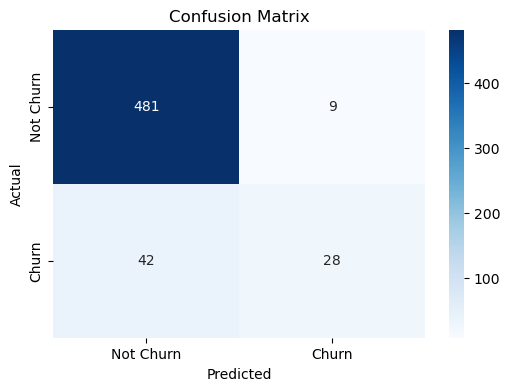

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train (fit) the model
log_reg.fit(X_train, Y_train)

# Make predictions
Y_pred = log_reg.predict(X_test)


print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Print Classification Report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Not Churn (0) Predictions:

* Precision = 0.92 → 92% of "Not Churn" predictions were actually correct (low false positives).

* Recall = 0.98 → The model captured 98% of actual "Not Churn" users (almost perfect recall).

* F1-Score = 0.95 → Excellent balance between precision and recall.

Churn (1) Predictions:

* Precision = 0.76 → 76% of "Churn" predictions were actually correct, meaning some false positives exist.
* Recall = 0.40 → The model only detected 40% of actual Churn cases, meaning it missed 60% of customers who actually churned (high false negatives).
* F1-Score = 0.52 → The model struggles to balance precision and recall for the Churn class


Overall the model has a high  Accuracy (91%), but...
 * Poor Recall for Churn (40%) → The model fails to capture many actual churners (high false negatives).
 * Class Imbalance Problem → Since only 70 out of 560 samples are Churners, the model is biased toward predicting Not Churn (0).


Next I will try and tune the model for classifying churn to improve recall


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define model
log_reg = LogisticRegression(solver='liblinear')

# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Controls regularization strength
    'class_weight': [None, 'balanced']  # Adjusts for class imbalance
}

# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, Y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
Y_pred_tuned = best_model.predict(X_test)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.01, 'class_weight': 'balanced'}


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85       490
           1       0.32      0.77      0.45        70

    accuracy                           0.76       560
   macro avg       0.64      0.77      0.65       560
weighted avg       0.88      0.76      0.80       560



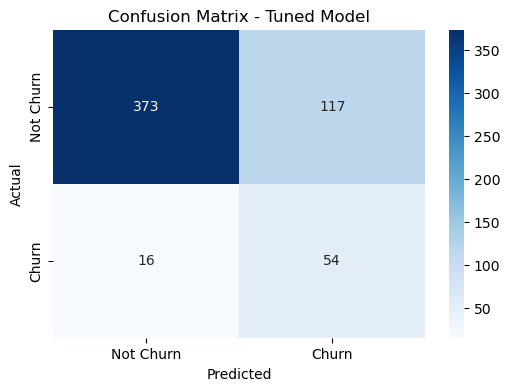

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print("Classification Report:\n", classification_report(Y_test, Y_pred_tuned))

# Draw confusion matrix
cm = confusion_matrix(Y_test, Y_pred_tuned)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Model')
plt.show()